This notebook aims to check the distribution of hydrocarbons emission/distribution in the Arctic

## DC8 observation during ARCTAS-B

During ARCTAS-B, only the Flight 23 flied above 70N.

We checked the CH4 and CO to see whether it's affected by fir or other pollutions.

In [1]:
import xarray as xr
import proplot as pplt

In [2]:
ds_nav = xr.open_dataset('../data/DC8/WWW-AIR_1650887094938/nav_dc8_20080709_r1.ict',
                engine='pseudonetcdf')
ds_nav = ds_nav.swap_dims({'POINTS': 'UTC'}).rename({"UTC": "t"})

**PNC:/home/xin/miniconda3/lib/python3.9/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  NetCDF: Not a valid ID


In [3]:
#  CO CH4 N2O
ds_dacom = xr.open_dataset('../data/DC8/WWW-AIR_1650887094938/DACOM_DC8_20080709_R2.ict',
                engine='pseudonetcdf')
ds_dacom = ds_dacom.swap_dims({'POINTS': 'UT_Time'}).rename({"UT_Time": "t"})

# subset to valid location
ds_dacom = ds_dacom.sel(t=ds_nav['t'])

# drop missing value
ds_dacom = ds_dacom.where(ds_dacom['CH4_ppbv']!=ds_dacom['CH4_ppbv'].attrs['fill_value'], drop=True)
ds_nav = ds_nav.where(ds_dacom['CH4_ppbv']!=ds_dacom['CH4_ppbv'].attrs['fill_value'], drop=True)

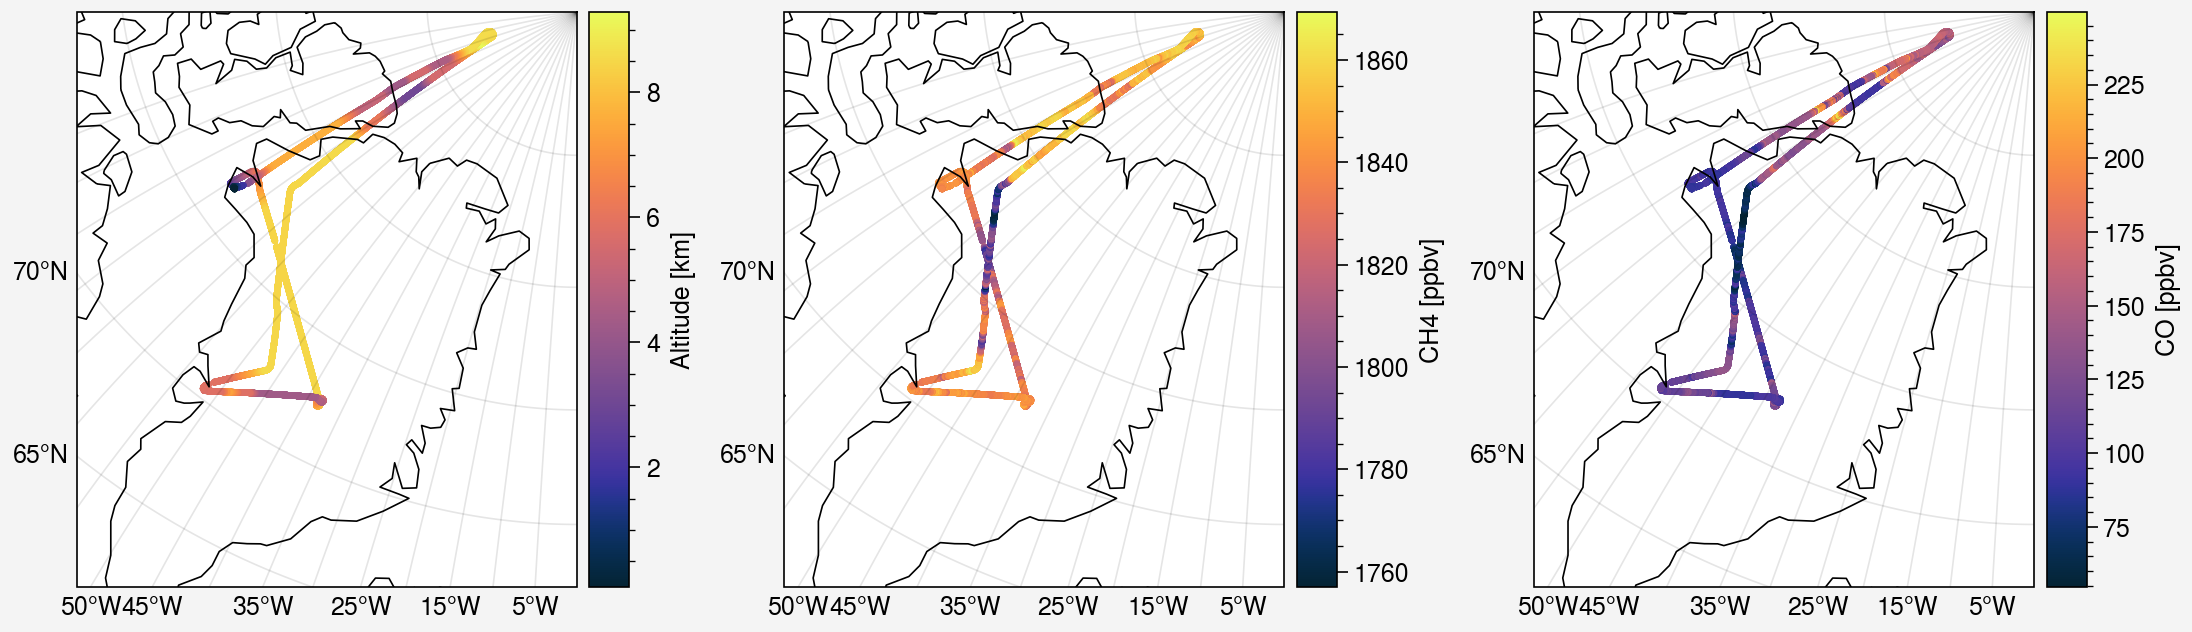

In [4]:
# rc['cartopy.circular']

fig, axs = pplt.subplots(ncols=3, proj='stere')

ax = axs[0]
s = ax.scatter(ds_nav['LON'], ds_nav['LAT'], c=ds_nav['GPS_ALT']/1e3, cmap='Thermal', s=3)
ax.colorbar([s], label='Altitude [km]')

ax = axs[1]
s = ax.scatter(ds_nav['LON'], ds_nav['LAT'], c=ds_dacom['CH4_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CH4 [ppbv]')

ax = axs[2]
s = ax.scatter(ds_nav['LON'], ds_nav['LAT'], c=ds_dacom['CO_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CO [ppbv]')


axs.format(latlim=(65, 90), lonlim=(-58, -30),
           labels=True,
           coast=True,
           )

Unfortunately, the region above 70 N is affected by fire, because the CO concentration is high.

## Emission (ECLIPSE V6)

Because we don't have any avaliable aircraft observations above 70N, it's useful to check the emission inventory.

In [5]:
ch4_emis = xr.open_dataset('../data/eclipse/ECLIPSE_V6b_CLE_base_CH4.nc').sel(time=2020)['emis_all']
voc_emis = xr.open_dataset('../data/eclipse/ECLIPSE_V6b_CLE_base_VOC.nc').sel(time=2020)['emis_all']

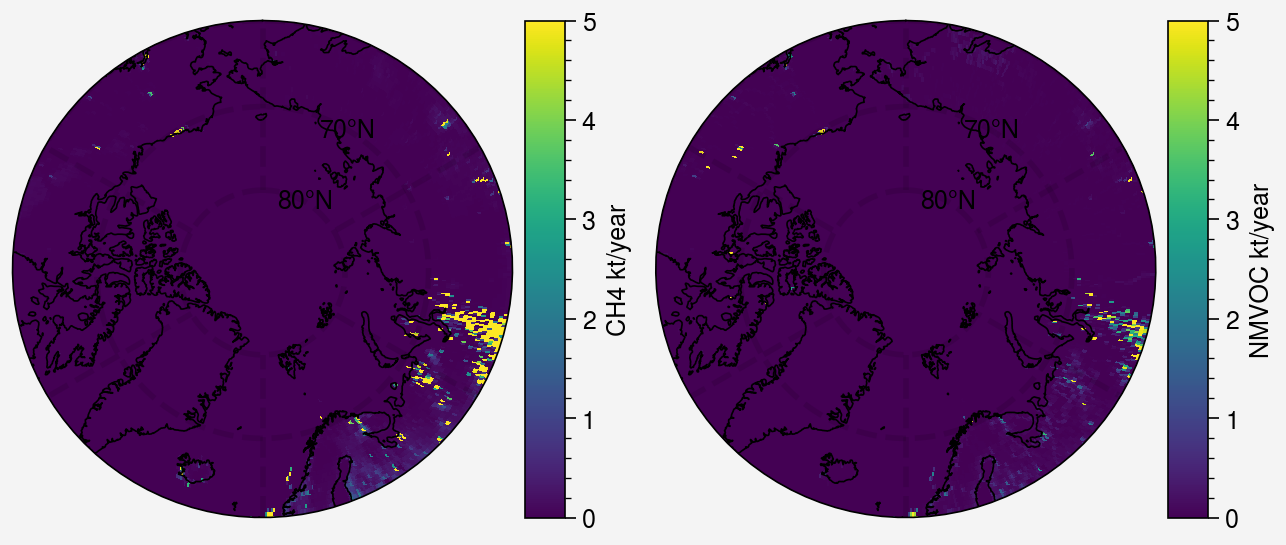

In [6]:
fig, axs = pplt.subplots(ncols=2, proj='npstere')

ax = axs[0]
m = ax.pcolormesh(ch4_emis['lon'], ch4_emis['lat'], ch4_emis, cmap='viridis', vmax=5, discrete=False)
ax.colorbar([m], label=f'CH4 {ch4_emis.units}')

ax = axs[1]
m = ax.pcolormesh(voc_emis['lon'], voc_emis['lat'], voc_emis, cmap='viridis', vmax=5, discrete=False)
ax.colorbar([m], label=f'NMVOC {voc_emis.units}')

axs.format(coast=True, reso='med',
        latlines=10, gridcolor='black', gridlinewidth=2, gridlinestyle='--', latinline=True,
        boundinglat=60,
        facecolor='Gray'
        )

The 